In [18]:
%%bigquery
CREATE OR REPLACE TABLE `calcium-complex-407414.github_data.data` AS
WITH Languages AS (
    SELECT
        repo_name,
        language.name AS language,
        language.bytes,
        ROW_NUMBER() OVER (PARTITION BY repo_name ORDER BY bytes DESC) AS row_num
    FROM `bigquery-public-data.github_repos.languages`, UNNEST(language) AS language
),
Messages AS (
    SELECT message, (SELECT AS STRUCT value FROM UNNEST(repo_name) AS value LIMIT 1).value AS repo_name
    FROM `bigquery-public-data.github_repos.commits`
)
SELECT c.message, l.language, l.repo_name
FROM Messages c
JOIN Languages l ON c.repo_name = l.repo_name
WHERE l.row_num = 1
ORDER BY l.repo_name

Query is running:   0%|          |

""


In [125]:
%%bigquery
CREATE OR REPLACE TABLE `calcium-complex-407414.github_data.positive` AS
SELECT
  language,
  COUNTIF(REGEXP_CONTAINS(message, r'\b(?:yes|yay|hallelujah|hurray|bingo|amused|cheerful|excit(?:ed|ing)|glad|proud|ha(ha)+|he(he)+|lol|rofl|lmfao|lulz|lolz|rotfl|lawl|hilarious|awesome|amazing|fantastic|bravo|kudos|great|excellent|outstanding|superb|terrific|incredible|wonderful|fabulous|splendid|joyful|happy|delight(?:ed|ful)|victorious|celebration|victory|win|triumph|smile|love|positive|good|beautiful|best|fun|cool|perfect)\b')) AS regex_matched_count,
  COUNT(*) AS total_count
FROM `calcium-complex-407414.github_data.data`
GROUP BY language
ORDER BY total_count DESC
LIMIT 15;

Query is running:   0%|          |

""


In [126]:
%%bigquery positive
SELECT *
FROM `calcium-complex-407414.github_data.positive`
ORDER BY regex_matched_count / total_count DESC

Query is running:   0%|          |

Downloading:   0%|          |

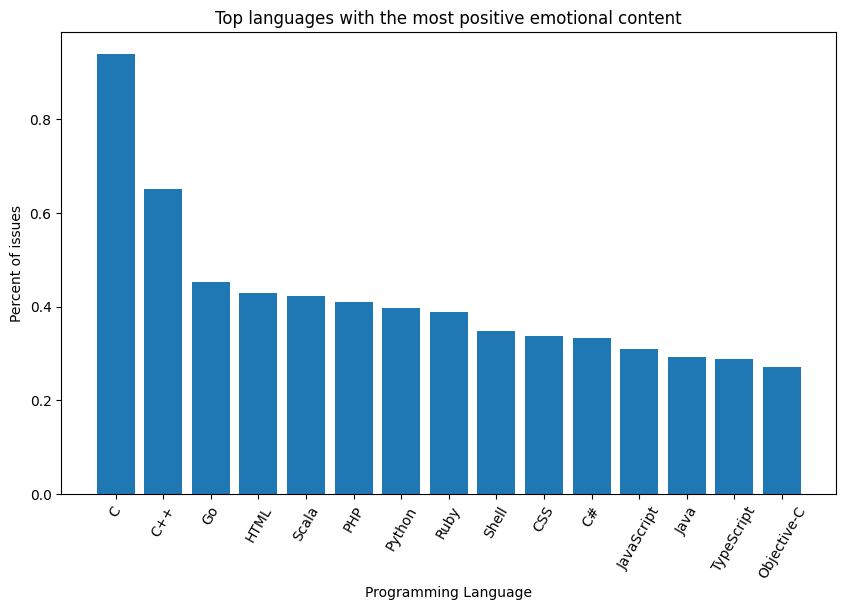

In [127]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(positive['language'], positive['regex_matched_count'] / positive['total_count'] * 100) 
plt.title('Top languages with the most positive emotional content') 
plt.xlabel('Programming Language')
plt.ylabel('Percent of issues')
plt.xticks(rotation=60)
plt.show()

In [110]:
%%bigquery
CREATE OR REPLACE TABLE `calcium-complex-407414.github_data.negative` AS
SELECT
  language,
  COUNTIF(REGEXP_CONTAINS(message, r'\b(?:a+rgh|angry|annoyed|annoying|appalled|bitter|cranky|hate|hating|mad|wtf|wth|omfg|hell|ass|bitch|bullshit|bloody|fucking?|shit+y?|crap+y?|fuck|damn|piss|screw|suck)e?d?\b')) AS regex_matched_count,
  COUNT(*) AS total_count
FROM `calcium-complex-407414.github_data.data`
GROUP BY language
ORDER BY total_count DESC
LIMIT 15;

Query is running:   0%|          |

""


In [114]:
%%bigquery negative
SELECT *
FROM `calcium-complex-407414.github_data.negative`
ORDER BY regex_matched_count / total_count DESC

Query is running:   0%|          |

Downloading:   0%|          |

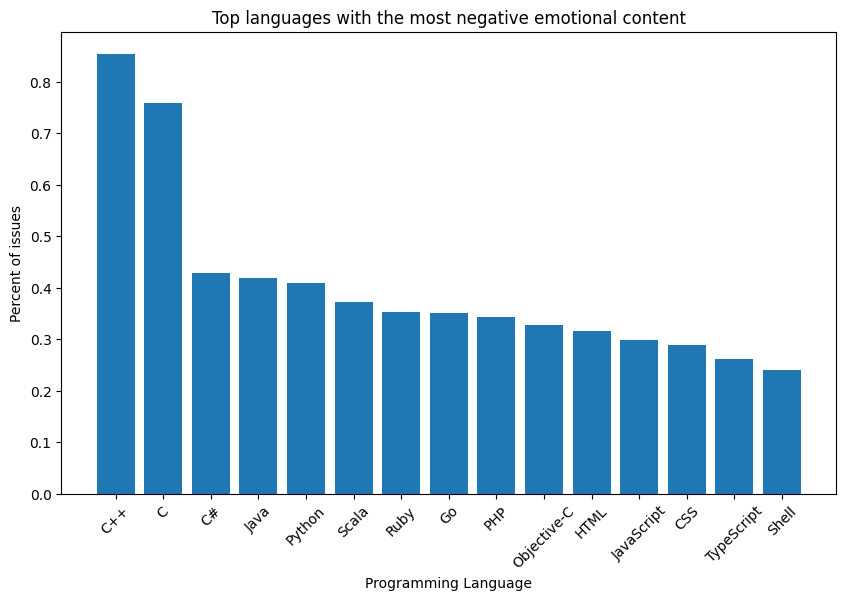

In [117]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(negative['language'], negative['regex_matched_count'] / negative['total_count'] * 100) 
plt.title('Top languages with the most negative emotional content') 
plt.xlabel('Programming Language')
plt.ylabel('Percent of issues')
plt.xticks(rotation=45)
plt.show()